Практическое задание №3 «Визуализация многомерных данных. Создание пиктограмм при помощи Matplotlib» Вариант 7

Для анализа исследованы атрибуты файла «bldg-MC2.csv», содержащие в названии «F_2_Z_2_».

В первую очередь импортируем необходимые библиотеки, создадим необходимые переменные

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from matplotlib.patches import Ellipse, Arc, Polygon, Wedge

selected_attributes = []

tracked_columns = [
    'F_2_Z_2: Lights Power',
    'F_2_Z_2: Equipment Power',
    'F_2_Z_2: Thermostat Temp',
    'F_2_Z_2: Thermostat Heating Setpoint',
    'F_2_Z_2: Thermostat Cooling Setpoint',
    'F_2_Z_2 VAV REHEAT Damper Position',
    'F_2_Z_2 REHEAT COIL Power',
    'F_2_Z_2 RETURN OUTLET CO2 Concentration',
    'F_2_Z_2 SUPPLY INLET Temperature',
    'F_2_Z_2 SUPPLY INLET Mass Flow Rate'
]

reindexed_columns = [
    'F_2_Z_2: Thermostat Temp',  # цвет волос
    'F_2_Z_2 RETURN OUTLET CO2 Concentration',  # цвет лица
    'F_2_Z_2: Lights Power',  # длина волос слева
    'F_2_Z_2: Equipment Power',  # длина волос справа
    'F_2_Z_2 VAV REHEAT Damper Position',  # брови слева
    'F_2_Z_2 REHEAT COIL Power',  # брови справа
    'F_2_Z_2: Thermostat Heating Setpoint',  # глаза слева
    'F_2_Z_2: Thermostat Cooling Setpoint'  # глаза справа
]

Пропишем реализацию класса для визуализации лиц Чернова.

In [ ]:
class ChernoffFaces:
    DATA = {
        "HAIR_COLOR": None,
        "SKIN_COLOR": None,
        "HAIR_LEFT": None,
        "HAIR_RIGHT": None,
        "EYEBROW_CURVATURE_LEFT": None,
        "EYEBROW_CURVATURE_RIGHT": None,
        "EYE_HEIGHT_LEFT": None,
        "EYE_HEIGHT_RIGHT": None,
        "PUPIL_SIZE": 0.2,
        "NOSE_WIDTH": None,
        "MOUTH_HEIGHT": 0.2,
        "MOUTH_WIDTH": None,
    }

    DYNAMIC_PARAMETERS = [
        "HAIR_COLOR",
        "SKIN_COLOR",
        "HAIR_LEFT",
        "HAIR_RIGHT",
        "EYEBROW_CURVATURE_LEFT",
        "EYEBROW_CURVATURE_RIGHT",
        "EYE_HEIGHT_LEFT",
        "EYE_HEIGHT_RIGHT",
        #    "NOSE_WIDTH",
        #    "MOUTH_WIDTH",
    ]

    def __init__(self, df, labels=None, filename='faces'):

        if not labels:
            self.labels = df.iloc[:, 0].values
            df = df[df.columns.drop(df.columns[0])]

        self.data = df

        for index, key in enumerate(self.DYNAMIC_PARAMETERS):
            self.DATA[key] = self.data[self.data.columns[index % len(self.data.columns)]].values.tolist()

        self.filename = filename

    def render_face(self, ax, title='', index=None):

        height, width = ax.bbox.height, ax.bbox.width

        self.draw_hair(ax, index, width, height)
        self.draw_face(ax, index, width, height)
        self.draw_l_brow(ax, index)
        self.draw_r_brow(ax, index)
        self.draw_l_eye(ax, index)
        self.draw_r_eye(ax, index)
        #    self.draw_nose(ax, index)
        #   self.draw_mouth(ax, index)

        ax.title.set_text(title)
        ax.axis('off')
        ax.autoscale()

    def draw_hair(self, ax, index, width, height):

        hair_width = width
        hair_height = height

        colour = plt.cm.coolwarm(self.DATA["HAIR_COLOR"][index])  # настройка цветов

        trapeze = Polygon(
            xy=[
                [0, hair_height * 0.5 * (1 - self.DATA["HAIR_LEFT"][index])],
                [0, hair_height * 0.5],
                [hair_width, hair_height * 0.5],
                [hair_width, hair_height * 0.5 * (1 - self.DATA["HAIR_RIGHT"][index])],
            ],
            fc=colour
        )
        ax.add_patch(trapeze)

        top = Wedge(
            center=[hair_width / 2, hair_height * 0.5 - 1],
            r=hair_width / 2,
            theta1=0,
            theta2=180,
            edgecolor='none',
            fc=colour,
        )
        ax.add_patch(top)

    def draw_face(self, ax, index, width, height):

        face_width = width * 2 / 3
        face_height = height * 1 / 2
        self.UNIT_WIDTH = face_width / 7
        self.UNIT_HEIGHT = face_height / 7
        self.FACE_CENTER = [width / 2, height / 2]

        colour = plt.cm.RdBu(self.DATA["SKIN_COLOR"][index])  # настройка цветов

        ellipse = Ellipse(
            xy=self.FACE_CENTER,
            width=face_width,
            height=face_height,
            edgecolor='black',
            fc=colour,
            lw=2
        )
        ax.add_patch(ellipse)

    def draw_l_brow(self, ax, index):

        brow_width = self.UNIT_WIDTH * 1.5
        brow_height = self.UNIT_HEIGHT * self.DATA["EYEBROW_CURVATURE_LEFT"][index]
        if brow_height == 0:
            brow_height = 0.001

        brow_l_center = [sum(i) for i in zip(*[
            self.FACE_CENTER,
            [brow_width, self.UNIT_HEIGHT * 1.1]
        ])]

        brow_l = Arc(
            xy=brow_l_center,
            width=brow_width,
            height=brow_height,
            theta1=0,
            theta2=180,
            edgecolor='black',
            fc='None',
            lw=2
        )
        ax.add_patch(brow_l)

    def draw_r_brow(self, ax, index):

        brow_width = self.UNIT_WIDTH * 1.5
        brow_height = self.UNIT_HEIGHT * self.DATA["EYEBROW_CURVATURE_RIGHT"][index]

        if brow_height == 0:
            brow_height = 0.001

        brow_r_center = [sum(i) for i in zip(*[
            self.FACE_CENTER,
            [-brow_width, self.UNIT_HEIGHT * 1.1]
        ])]

        brow_r = Arc(
            xy=brow_r_center,
            width=brow_width,
            height=brow_height,
            theta1=0,
            theta2=180,
            edgecolor='black',
            fc='None',
            lw=2
        )
        ax.add_patch(brow_r)

    def draw_l_eye(self, ax, index):

        eye_width = self.UNIT_WIDTH * 1.5
        eye_height = self.UNIT_HEIGHT * self.DATA["EYE_HEIGHT_LEFT"][index]

        if eye_height == 0:
            eye_height = 0.001

        eye_l_center = [sum(i) for i in zip(*[
            self.FACE_CENTER,
            [-eye_width, self.UNIT_HEIGHT / 2]
        ])]

        ellipse = Ellipse(
            xy=eye_l_center,
            width=eye_width,
            height=eye_height,
            edgecolor='black',
            fc='white',
            lw=1
        )
        ax.add_patch(ellipse)

        ellipse = Ellipse(
            xy=eye_l_center,
            width=eye_width / 2,
            height=eye_height,
            edgecolor='black',
            fc='black',
            lw=1
        )
        ax.add_patch(ellipse)

    def draw_r_eye(self, ax, index):

        eye_width = self.UNIT_WIDTH * 1.5
        eye_height = self.UNIT_HEIGHT * self.DATA["EYE_HEIGHT_RIGHT"][index]

        if eye_height == 0:
            eye_height = 0.001

        eye_r_center = [sum(i) for i in zip(*[
            self.FACE_CENTER,
            [eye_width, self.UNIT_HEIGHT / 2]
        ])]

        ellipse = Ellipse(
            xy=eye_r_center,
            width=eye_width,
            height=eye_height,
            edgecolor='black',
            fc='white',
            lw=1
        )
        ax.add_patch(ellipse)

        ellipse = Ellipse(
            xy=eye_r_center,
            width=eye_width / 2,
            height=eye_height,
            edgecolor='black',
            fc='black',
            lw=1
        )
        ax.add_patch(ellipse)

    def draw_nose(self, ax, index):

        nose_width = self.UNIT_WIDTH * (1 - self.DATA["NOSE_WIDTH"][index])
        nose_height = self.UNIT_HEIGHT

        pivot_left = [sum(i) for i in zip(*[
            self.FACE_CENTER,
            [-nose_width / 2, -nose_height]
        ])]

        pivot_right = [sum(i) for i in zip(*[
            self.FACE_CENTER,
            [nose_width / 2, -nose_height]
        ])]

        pivot_top = self.FACE_CENTER

        points = np.array([pivot_left, pivot_right, pivot_top])
        nose = plt.Polygon(
            points,
            closed=True,
            lw=1,
            fc="black",
            edgecolor='black',
        )
        ax.add_patch(nose)

    def draw_mouth(self, ax, index):

        mouth_width = self.UNIT_WIDTH * 3 * self.DATA["MOUTH_WIDTH"][index]
        mouth_height = self.UNIT_HEIGHT * 1.5 * self.DATA["MOUTH_HEIGHT"]

        mouth_center = [sum(i) for i in zip(*[
            self.FACE_CENTER,
            [0, -self.UNIT_HEIGHT * 2]
        ])]

        ellipse = Ellipse(
            xy=mouth_center,
            width=mouth_width,
            height=mouth_height,
            edgecolor='black',
            fc="black",
            lw=1
        )
        ax.add_patch(ellipse)

    def render(self, n_cols=2, n_rows=1, figsize=(2, 2), empty_cols_ids=()):
        fig, ax = plt.subplots(
            nrows=n_rows,
            ncols=n_cols,
            figsize=figsize,
            # sharey=True,
            # sharex=True,
            constrained_layout=True,
        )
        fig.patch.set_facecolor('white')
        axes = ax.flatten()
        for i, ax in enumerate(axes):
            if i in empty_cols_ids:
                ax.remove()
            # if i == 0:
            #     self.render_face(ax, title=f"Reference", index=i)
            #     continue
            self.render_face(ax, title=f"Day {i+1}", index=i)

        plt.suptitle('Chernoff faces')
        plt.show()

Добавим функцию для представления корреляционной матрицы

In [ ]:
def heatmap(df, ax, title):
    corr = df.corr()

    # пропустим пары со слабой корреляцией, попробуем поэкспериментировать с этой настройкой
    df_corr = corr[(corr >= .6) | (corr <= -.6)]

    mask = np.triu(np.ones_like(corr))
    sns.heatmap(
        df_corr,
        cbar=False,
        mask=mask,
        ax=ax,
        annot=True,
        cmap='coolwarm',
        vmin=-1,
        vmax=1,
    )

    ax.title.set_text(title)
    ax.tick_params(
        top=False,
        bottom=False,
        left=False,
        right=False,
    )

Реализуем функцию для вызова предыдущей

In [ ]:
def draw_heatmaps(data_frames):
    n_rows = 2
    n_cols = (len(data_frames) + 1) // 2
    # создание сетки графиков
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8))

    # преобразование двумерного массива осей в одномерный массив
    axes = axes.flatten()

    # построение графиков
    for i, df in enumerate(data_frames):
        # выбор набора столбцов

        if not df.empty:
            corr = df.corr()

            # Omit pairs with weak correlation, try to experiments with this setting
            df_corr = corr[((corr >= .9) | (corr <= -.9))]
            # построение heatmap
            if (i == 0):
                ax = sns.heatmap(df_corr, cmap='coolwarm', ax=axes[i], xticklabels=False, yticklabels=True)
            elif (i == 7):
                ax = sns.heatmap(df_corr, cmap='coolwarm', ax=axes[i], xticklabels=True, yticklabels=True)
            elif (i >7):
                ax = sns.heatmap(df_corr, cmap='coolwarm', ax=axes[i], xticklabels=True, yticklabels=False)
            else:
                ax = sns.heatmap(df_corr, cmap='coolwarm', ax=axes[i], xticklabels=False, yticklabels=False)


            # задание заголовка графика
            ax.set_title(f'Day {i + 1}', pad=20)

    # отображение графиков
    plt.tight_layout()
    fig.suptitle('Матрицы корреляции')
    plt.show()

Наконец, представим визуализацию необходимых параметров с помощью лиц Чернова

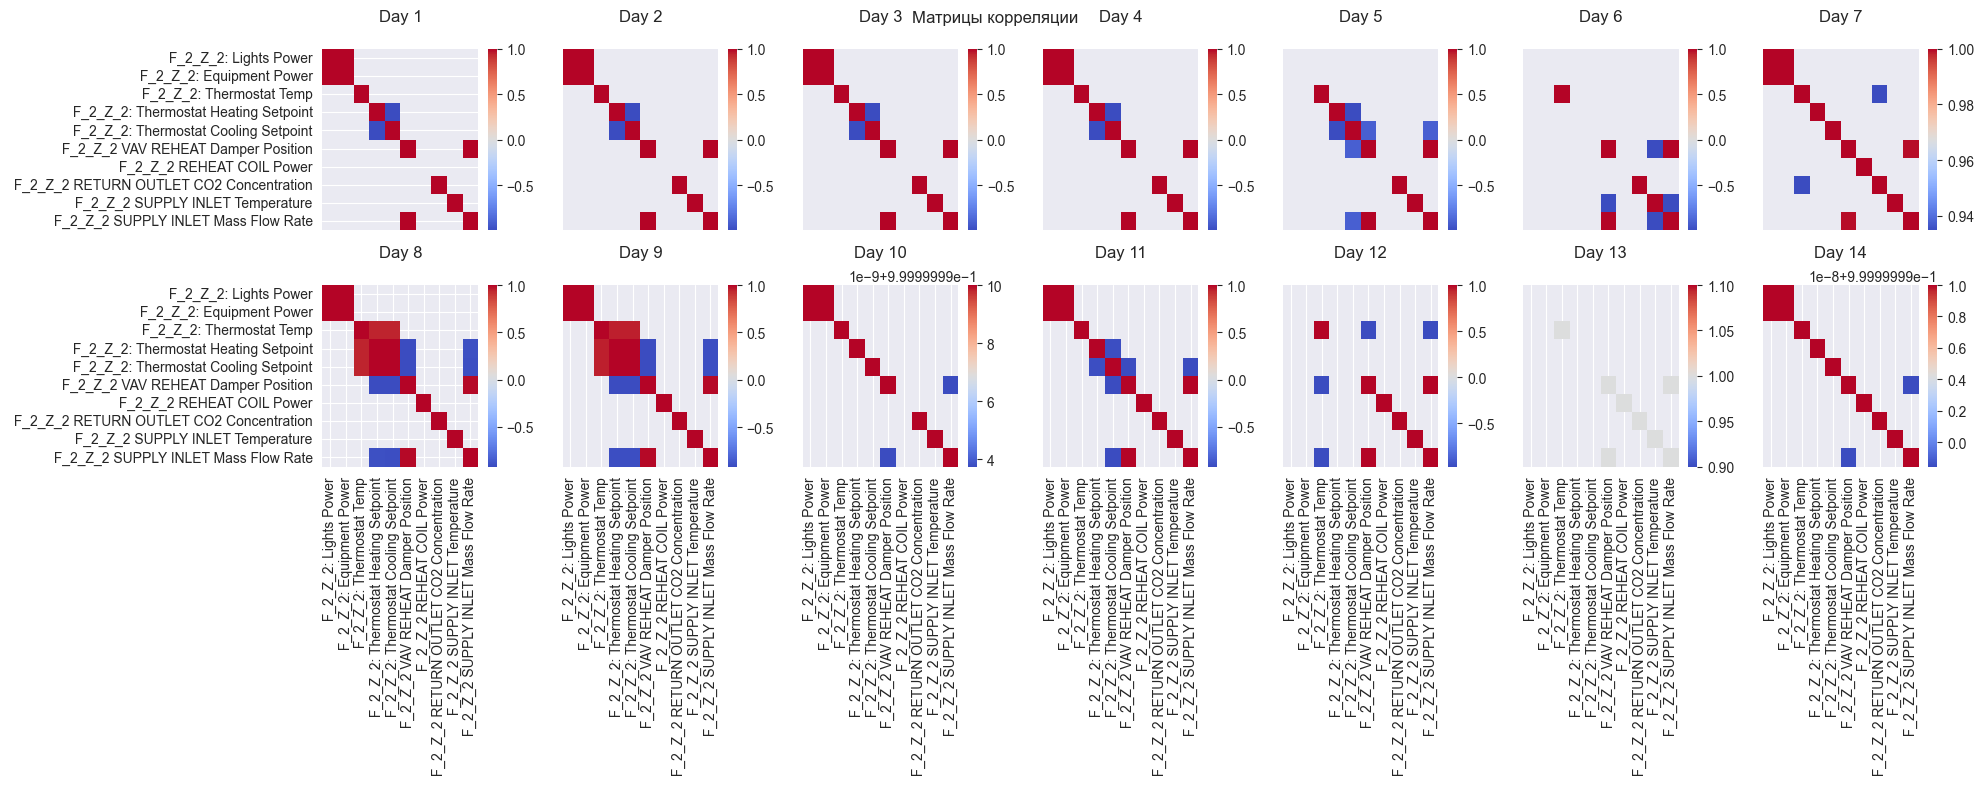

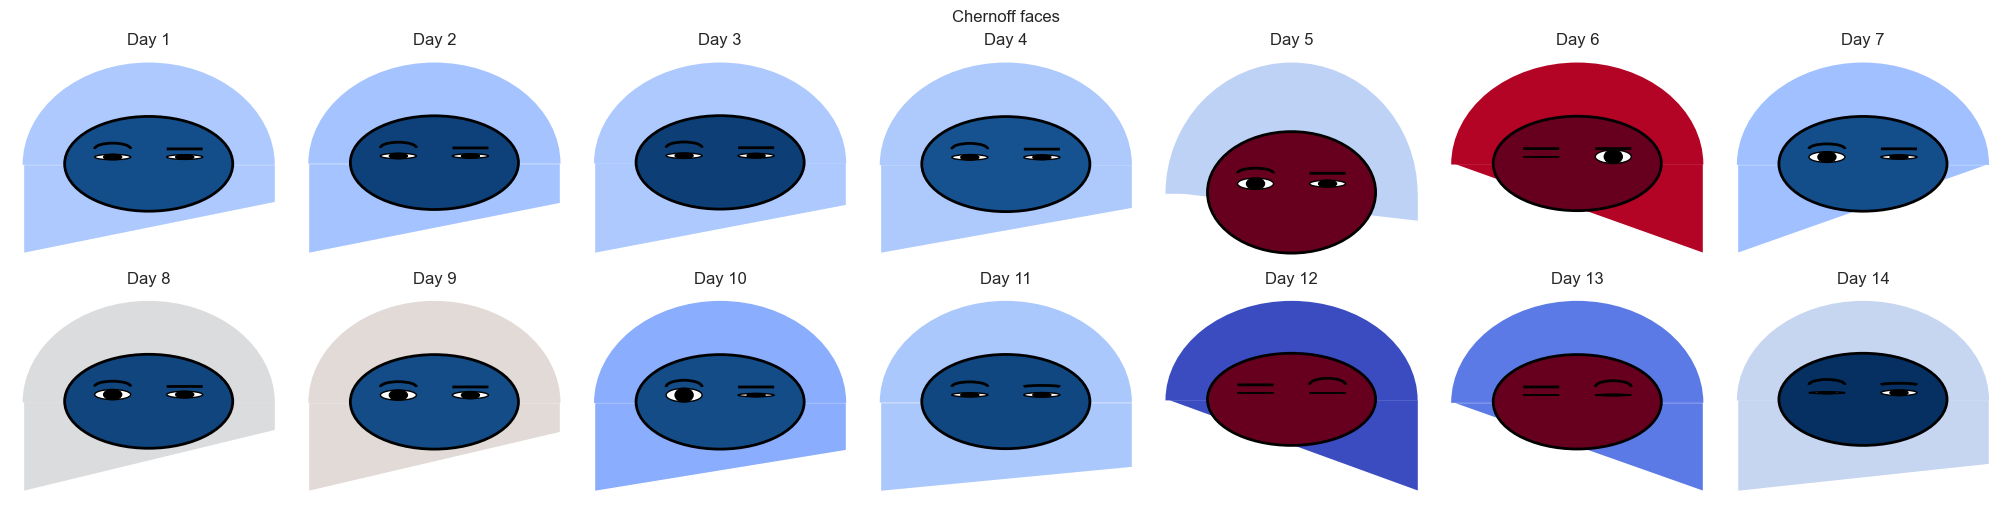

In [6]:
def main():
    df = pd.read_csv('bldg-MC2.csv')

    selected_attributes = [col for col in df.columns if 'F_2_Z_2' in col]

    df_selected = df[['Date/Time'] + selected_attributes]

    # # Устанавливаем настройки для полного вывода статистики о файле
    pd.set_option('display.expand_frame_repr', False)
    #

    days = []
    data_frames = [df_selected[df_selected['Date/Time'].str.contains('2016-05-31')]]
    days.append('2016-05-31')

    for i in range(1, 10):
        data_frames.append(df_selected[df_selected['Date/Time'].str.contains(f'2016-06-0{i}')])
        days.append(f'2016-06-0{i}')

    for i in range(10, 14):
        data_frames.append(df_selected[df_selected['Date/Time'].str.contains(f'2016-06-{i}')])
        days.append(f'2016-06-{i}')

    tracked_columns = [
        'F_2_Z_2: Lights Power',
        'F_2_Z_2: Equipment Power',
        'F_2_Z_2: Thermostat Temp',
        'F_2_Z_2: Thermostat Heating Setpoint',
        'F_2_Z_2: Thermostat Cooling Setpoint',
        'F_2_Z_2 VAV REHEAT Damper Position',
        'F_2_Z_2 REHEAT COIL Power',
        'F_2_Z_2 RETURN OUTLET CO2 Concentration',
        'F_2_Z_2 SUPPLY INLET Temperature',
        'F_2_Z_2 SUPPLY INLET Mass Flow Rate'
    ]

    new_frames = []
    for frame in data_frames:
        new_frames.append(frame.drop(frame.columns[0], axis=1))

    data = new_frames

    draw_heatmaps(data)

    scaled_data = data
    for i, df in enumerate(data):
        scaled_temp = pd.DataFrame(
            preprocessing.MinMaxScaler().fit_transform(df),
            columns=df.columns)
        scaled_data[i] = scaled_temp
    scaled_data[0].head()
    data = scaled_data

    mean_data = []

    for i, df in enumerate(data):
        mean_data.append([*df.mean().tolist()])

    mean_df = pd.DataFrame(mean_data, columns=tracked_columns)

    reindexed_columns = [
        'F_2_Z_2: Thermostat Temp',  # цвет волос
        'F_2_Z_2 RETURN OUTLET CO2 Concentration',  # цвет лица
        'F_2_Z_2: Lights Power',  # длина волос слева
        'F_2_Z_2: Equipment Power',  # длина волос справа
        'F_2_Z_2 VAV REHEAT Damper Position',  # брови слева
        'F_2_Z_2 REHEAT COIL Power',  # брови справа
        'F_2_Z_2: Thermostat Heating Setpoint',  # глаза слева
        'F_2_Z_2: Thermostat Cooling Setpoint'  # глаза справа
    ]
    mean_df = mean_df.reindex(columns=reindexed_columns)

    mean_df = pd.DataFrame(
        preprocessing.MinMaxScaler().fit_transform(mean_df.values),
        columns=mean_df.columns
    )

    c = ChernoffFaces(mean_df)
    c.render(
        n_cols=7,
        n_rows=2,
        figsize=(20, 5)
    )

if __name__ == '__main__':
    main()